# Downloading Datasets from Google Drive

In [ ]:
# # Train set
! gdown 1KqH3skTACd9qc8LTgp-yOPQ5_4Bcl-iG

# # Validation set
# ! gdown 1eA07CPay5GvFmYlOCqVy8_-k8cALf8oN

# # Test set
# ! gdown 13zqhTeUjFTQzK16BBWGa3VMt5XvxD8ti

#Train Labels
! gdown 15fQS0V_9jhPPGUQOUjRygT7mVyjZdfm8

Downloading...
From (original): https://drive.google.com/uc?id=1KqH3skTACd9qc8LTgp-yOPQ5_4Bcl-iG
From (redirected): https://drive.google.com/uc?id=1KqH3skTACd9qc8LTgp-yOPQ5_4Bcl-iG&confirm=t&uuid=d1fffb95-6a61-49d0-94c6-e479e4c6c147
To: /content/training_split.h5
100% 7.25G/7.25G [00:53<00:00, 135MB/s]
Downloading...
From: https://drive.google.com/uc?id=15fQS0V_9jhPPGUQOUjRygT7mVyjZdfm8
To: /content/camelyonpatch_level_2_split_train_y.h5
100% 264k/264k [00:00<00:00, 74.7MB/s]


## Loading Dataset and Extracting Samples


In [ ]:
import h5py

with h5py.File('/content/training_split.h5', 'r') as f:
  data = f['x'][:]

with h5py.File('/content/camelyonpatch_level_2_split_train_y.h5', 'r') as f:
  labels = f['y'][:]

In [ ]:
import numpy as np
negative_sample_image = np.copy(data[0])
negative_sample_label = np.copy(labels[0][0][0][0])
positive_sample_image = np.copy(data[1])
positive_sample_label = np.copy(labels[1][0][0][0])

array([[[226, 209, 225],
        [224, 210, 225],
        [223, 211, 223],
        ...,
        [218, 178, 230],
        [214, 182, 221],
        [188, 161, 192]],

       [[223, 209, 224],
        [222, 210, 224],
        [221, 211, 222],
        ...,
        [127,  87, 150],
        [159, 126, 181],
        [204, 176, 225]],

       [[222, 210, 224],
        [221, 210, 224],
        [219, 211, 222],
        ...,
        [ 77,  38, 117],
        [ 42,   8,  84],
        [137, 107, 179]],

       ...,

       [[123,  81, 165],
        [128,  90, 173],
        [126,  91, 173],
        ...,
        [203, 135, 210],
        [226, 155, 223],
        [202, 130, 194]],

       [[ 90,  52, 139],
        [ 90,  56, 142],
        [ 79,  45, 131],
        ...,
        [216, 152, 230],
        [179, 113, 185],
        [217, 152, 220]],

       [[ 85,  51, 138],
        [101,  68, 155],
        [ 91,  59, 144],
        ...,
        [200, 136, 220],
        [204, 142, 217],
        [192, 130, 203]]], dtype=uint8)
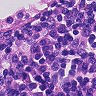

In [ ]:
negative_sample_image

array([[[243, 196, 232],
        [159, 111, 149],
        [117,  69, 109],
        ...,
        [116,  70, 107],
        [149, 114, 144],
        [255, 244, 255]],

       [[255, 232, 255],
        [ 82,  38,  71],
        [167, 126, 160],
        ...,
        [117,  73, 109],
        [172, 138, 165],
        [181, 153, 175]],

       [[255, 227, 251],
        [ 85,  52,  79],
        [105,  71,  98],
        ...,
        [ 98,  57,  91],
        [151, 117, 142],
        [233, 204, 224]],

       ...,

       [[123,  82, 122],
        [ 67,  26,  66],
        [ 80,  39,  79],
        ...,
        [255, 240, 255],
        [255, 240, 255],
        [216, 172, 197]],

       [[ 96,  58,  99],
        [137,  99, 140],
        [144, 106, 147],
        ...,
        [175, 140, 164],
        [176, 136, 162],
        [208, 165, 193]],

       [[ 79,  40,  84],
        [117,  78, 122],
        [ 99,  60, 104],
        ...,
        [172, 138, 163],
        [157, 118, 147],
        [174, 131, 161]]], dtype=uint8)
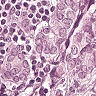

In [ ]:
positive_sample_image

In [ ]:
print(negative_sample_label)

0


In [ ]:
print(positive_sample_label)

1


Only center part of image is relevant to label creation, following line is just trim data to that section for more relevant processing

In [ ]:
#center = image[32:64,32:64]

# Data Pre-Processing

In [ ]:
import skimage as skimage
import matplotlib.pyplot as plt

## Pre-Processing: Noise Reduction

### Pre-Processing: Noise Reduction: Gaussian Filtering

Text(0.5, 1.0, 'Sigma = 3')

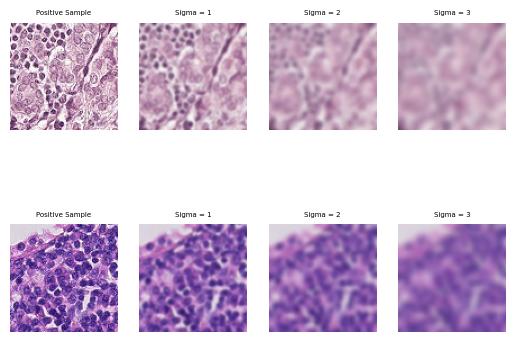

In [ ]:
gaussian_positive_images = []
for i in range(1,4):
  gaussian_positive_images.append(skimage.filters.gaussian(positive_sample_image, sigma=i, channel_axis = 2))

fig, axarr = plt.subplots(2,4)
axarr[0,0].imshow(positive_sample_image)
axarr[0,0].axis("off")
axarr[0,0].set_title("Positive Sample", fontsize = 5)

axarr[0,1].imshow(gaussian_positive_images[0])
axarr[0,1].axis("off")
axarr[0,1].set_title("Sigma = 1", fontsize = 5)

axarr[0,2].imshow(gaussian_positive_images[1])
axarr[0,2].axis("off")
axarr[0,2].set_title("Sigma = 2", fontsize = 5)

axarr[0,3].imshow(gaussian_positive_images[2])
axarr[0,3].axis("off")
axarr[0,3].set_title("Sigma = 3", fontsize = 5)


gaussian_negative_images = []
for i in range(1,4):
  gaussian_negative_images.append(skimage.filters.gaussian(negative_sample_image, sigma=i, channel_axis = 2))

axarr[1,0].imshow(negative_sample_image)
axarr[1,0].axis("off")
axarr[1,0].set_title("Positive Sample", fontsize = 5)

axarr[1,1].imshow(gaussian_negative_images[0])
axarr[1,1].axis("off")
axarr[1,1].set_title("Sigma = 1", fontsize = 5)

axarr[1,2].imshow(gaussian_negative_images[1])
axarr[1,2].axis("off")
axarr[1,2].set_title("Sigma = 2", fontsize = 5)

axarr[1,3].imshow(gaussian_negative_images[2])
axarr[1,3].axis("off")
axarr[1,3].set_title("Sigma = 3", fontsize = 5)

By case-based inspection, seem to lose resolution of individual cells (circles) at sigma = 3, and assuming that distinguishing between two different cells is important for classification (i.e. two neighboring cells, one of which may be cancerous and the other is not), would ideally choose sigma = 0,1, or 2, could try all with all algorithms and generate performance results.

### Pre-Processing: Noise Reduction: Median Filtering

Text(0.5, 1.0, 'Median Filtering: Negative Sample')

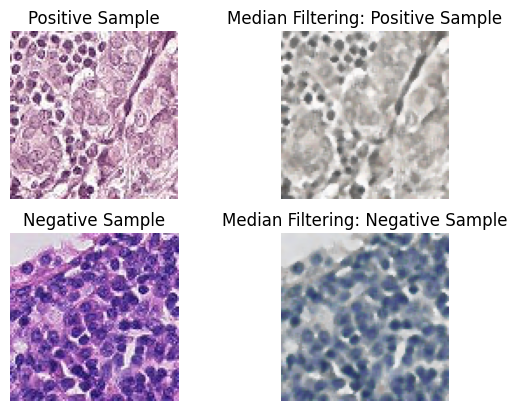

In [ ]:
median_positive_image = skimage.filters.median(positive_sample_image)
median_negative_image = skimage.filters.median(negative_sample_image)

fig, axarr = plt.subplots(2,2)

axarr[0,0].imshow(positive_sample_image)
axarr[0,0].axis("off")
axarr[0,0].set_title("Positive Sample")

axarr[0,1].imshow(median_positive_image)
axarr[0,1].axis("off")
axarr[0,1].set_title("Median Filtering: Positive Sample")


axarr[1,0].imshow(negative_sample_image)
axarr[1,0].axis("off")
axarr[1,0].set_title("Negative Sample")

axarr[1,1].imshow(median_negative_image)
axarr[1,1].axis("off")
axarr[1,1].set_title("Median Filtering: Negative Sample")

Median filtering maintains resolution of individual cells, as well as reduces the amount of "blemishes" visible within the cells themselves (smooths out values of cells to contain about only one color per cell) instead of certain cells having features such as striations or spots that may be uninformative.

### Pre-Processing: Noise Reduction: Bilateral Filtering

Text(0.5, 1.0, 'Bilateral Filtering: Negative Sample')

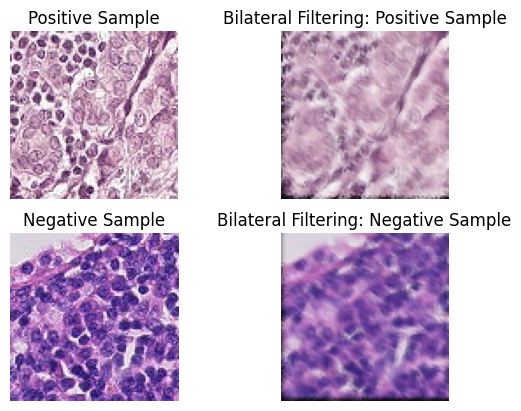

In [ ]:
bilateral_positive_image = skimage.restoration.denoise_bilateral(positive_sample_image, channel_axis = 2)
bilateral_negative_image = skimage.restoration.denoise_bilateral(negative_sample_image, channel_axis = 2)

fig, axarr = plt.subplots(2,2)

axarr[0,0].imshow(positive_sample_image)
axarr[0,0].axis("off")
axarr[0,0].set_title("Positive Sample")

axarr[0,1].imshow(bilateral_positive_image)
axarr[0,1].axis("off")
axarr[0,1].set_title("Bilateral Filtering: Positive Sample")


axarr[1,0].imshow(negative_sample_image)
axarr[1,0].axis("off")
axarr[1,0].set_title("Negative Sample")

axarr[1,1].imshow(bilateral_negative_image)
axarr[1,1].axis("off")
axarr[1,1].set_title("Bilateral Filtering: Negative Sample")

Does not appear to be a viable preprocessing filter to consider. This is because both cell-level distinction is lost, and there appear to be streaking artifacts created by application of this filter. A reason for this appearance is that for larger values of the sigma spatial parameter, the filter causes pixels that are close in color value at larger distances to be considered similar and create visible mixing "streaks" across regions.

## Pre-Processing: Feature Extraction

### Pre-Processing: Feature Extraction: Sobel and Canny Edge Detection

Text(0.5, 1.0, 'Blue Sobel Edge Detection')

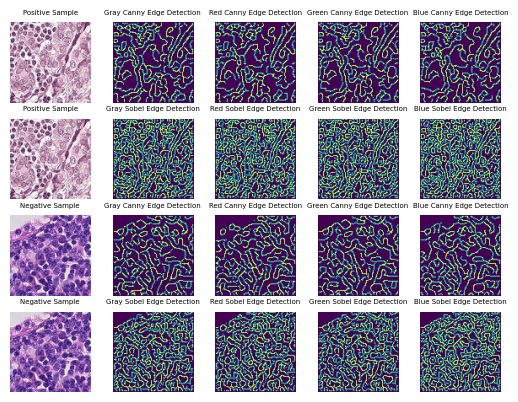

In [ ]:
positive_gray_image = skimage.color.rgb2gray(positive_sample_image)
positive_red_image = positive_sample_image[:,:,0]
positive_green_image = positive_sample_image[:,:,1]
positive_blue_image = positive_sample_image[:,:,2]
negative_gray_image = skimage.color.rgb2gray(negative_sample_image)
negative_red_image = negative_sample_image[:,:,0]
negative_green_image = negative_sample_image[:,:,1]
negative_blue_image = negative_sample_image[:,:,2]

positive_gray_edges_canny = skimage.feature.canny(positive_gray_image, sigma = 2)
positive_red_edges_canny = skimage.feature.canny(positive_red_image, sigma = 2)
positive_green_edges_canny = skimage.feature.canny(positive_green_image, sigma = 2)
positive_blue_edges_canny = skimage.feature.canny(positive_blue_image, sigma = 2)

positive_gray_edges_sobel = skimage.feature.canny(positive_gray_image)
positive_red_edges_sobel = skimage.feature.canny(positive_red_image)
positive_green_edges_sobel = skimage.feature.canny(positive_green_image)
positive_blue_edges_sobel = skimage.feature.canny(positive_blue_image)

negative_gray_edges_canny = skimage.feature.canny(negative_gray_image, sigma = 2)
negative_red_edges_canny = skimage.feature.canny(negative_red_image, sigma = 2)
negative_green_edges_canny = skimage.feature.canny(negative_green_image, sigma = 2)
negative_blue_edges_canny = skimage.feature.canny(negative_blue_image, sigma = 2)

negative_gray_edges_sobel = skimage.feature.canny(negative_gray_image)
negative_red_edges_sobel = skimage.feature.canny(negative_red_image)
negative_green_edges_sobel = skimage.feature.canny(negative_green_image)
negative_blue_edges_sobel = skimage.feature.canny(negative_blue_image)

fig, axarr = plt.subplots(4,5)

axarr[0,0].imshow(positive_sample_image)
axarr[0,0].axis("off")
axarr[0,0].set_title("Positive Sample", fontsize = 5)

axarr[0,1].imshow(positive_gray_edges_canny)
axarr[0,1].axis("off")
axarr[0,1].set_title("Gray Canny Edge Detection", fontsize = 5)

axarr[0,2].imshow(positive_red_edges_canny)
axarr[0,2].axis("off")
axarr[0,2].set_title("Red Canny Edge Detection", fontsize = 5)

axarr[0,3].imshow(positive_green_edges_canny)
axarr[0,3].axis("off")
axarr[0,3].set_title("Green Canny Edge Detection", fontsize = 5)

axarr[0,4].imshow(positive_blue_edges_canny)
axarr[0,4].axis("off")
axarr[0,4].set_title("Blue Canny Edge Detection", fontsize = 5)

axarr[1,0].imshow(positive_sample_image)
axarr[1,0].axis("off")
axarr[1,0].set_title("Positive Sample", fontsize = 5)

axarr[1,1].imshow(positive_gray_edges_sobel)
axarr[1,1].axis("off")
axarr[1,1].set_title("Gray Sobel Edge Detection", fontsize = 5)

axarr[1,2].imshow(positive_red_edges_sobel)
axarr[1,2].axis("off")
axarr[1,2].set_title("Red Sobel Edge Detection", fontsize = 5)

axarr[1,3].imshow(positive_green_edges_sobel)
axarr[1,3].axis("off")
axarr[1,3].set_title("Green Sobel Edge Detection", fontsize = 5)

axarr[1,4].imshow(positive_blue_edges_sobel)
axarr[1,4].axis("off")
axarr[1,4].set_title("Blue Sobel Edge Detection", fontsize = 5)

axarr[2,0].imshow(negative_sample_image)
axarr[2,0].axis("off")
axarr[2,0].set_title("Negative Sample", fontsize = 5)

axarr[2,1].imshow(negative_gray_edges_canny)
axarr[2,1].axis("off")
axarr[2,1].set_title("Gray Canny Edge Detection", fontsize = 5)

axarr[2,2].imshow(negative_red_edges_canny)
axarr[2,2].axis("off")
axarr[2,2].set_title("Red Canny Edge Detection", fontsize = 5)

axarr[2,3].imshow(negative_green_edges_canny)
axarr[2,3].axis("off")
axarr[2,3].set_title("Green Canny Edge Detection", fontsize = 5)

axarr[2,4].imshow(negative_blue_edges_canny)
axarr[2,4].axis("off")
axarr[2,4].set_title("Blue Canny Edge Detection", fontsize = 5)

axarr[3,0].imshow(negative_sample_image)
axarr[3,0].axis("off")
axarr[3,0].set_title("Negative Sample", fontsize = 5)

axarr[3,1].imshow(negative_gray_edges_sobel)
axarr[3,1].axis("off")
axarr[3,1].set_title("Gray Sobel Edge Detection", fontsize = 5)

axarr[3,2].imshow(negative_red_edges_sobel)
axarr[3,2].axis("off")
axarr[3,2].set_title("Red Sobel Edge Detection", fontsize = 5)

axarr[3,3].imshow(negative_green_edges_sobel)
axarr[3,3].axis("off")
axarr[3,3].set_title("Green Sobel Edge Detection", fontsize = 5)

axarr[3,4].imshow(negative_blue_edges_sobel)
axarr[3,4].axis("off")
axarr[3,4].set_title("Blue Sobel Edge Detection", fontsize = 5)

Canny: Appears that central region is homogenous in positive sample and not in negative sample (so potentially informative), not much in green channel but gray, red, and blue show differences (which can be explained by the fact that the images are purplish and would primarily contain encoding information in the red and blue channels).
Sobel: Not as informative as Canny, does not appear to clearly distinguish certain areas.

### Pre-Processing: Feature Extraction: Entropy Texture Analysis

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Radius = 10')

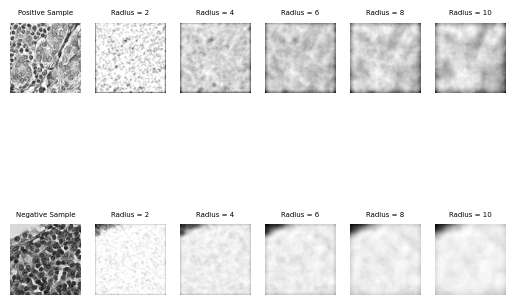

In [ ]:
positive_gray_image = skimage.color.rgb2gray(positive_sample_image)
negative_gray_image = skimage.color.rgb2gray(negative_sample_image)
negative_gray_image_entropy = skimage.filters.rank.entropy(negative_gray_image, skimage.morphology.disk(10))

fig, axarr = plt.subplots(2,6)

entropy_positive_images = []
for i in range(2,11,2):
  entropy_positive_images.append(skimage.filters.rank.entropy(positive_gray_image, skimage.morphology.disk(i)))

axarr[0,0].imshow(positive_gray_image, cmap = 'gray')
axarr[0,0].axis("off")
axarr[0,0].set_title("Positive Sample", fontsize = 5)

axarr[0,1].imshow(entropy_positive_images[0], cmap = 'gray')
axarr[0,1].axis("off")
axarr[0,1].set_title("Radius = 2", fontsize = 5)

axarr[0,2].imshow(entropy_positive_images[1], cmap = 'gray')
axarr[0,2].axis("off")
axarr[0,2].set_title("Radius = 4", fontsize = 5)

axarr[0,3].imshow(entropy_positive_images[2], cmap = 'gray')
axarr[0,3].axis("off")
axarr[0,3].set_title("Radius = 6", fontsize = 5)

axarr[0,4].imshow(entropy_positive_images[3], cmap = 'gray')
axarr[0,4].axis("off")
axarr[0,4].set_title("Radius = 8", fontsize = 5)

axarr[0,5].imshow(entropy_positive_images[4], cmap = 'gray')
axarr[0,5].axis("off")
axarr[0,5].set_title("Radius = 10", fontsize = 5)

entropy_negative_images = []
for i in range(2,11,2):
  entropy_negative_images.append(skimage.filters.rank.entropy(negative_gray_image, skimage.morphology.disk(i)))

axarr[1,0].imshow(negative_gray_image, cmap = 'gray')
axarr[1,0].axis("off")
axarr[1,0].set_title("Negative Sample", fontsize = 5)

axarr[1,1].imshow(entropy_negative_images[0], cmap = 'gray')
axarr[1,1].axis("off")
axarr[1,1].set_title("Radius = 2", fontsize = 5)

axarr[1,2].imshow(entropy_negative_images[1], cmap = 'gray')
axarr[1,2].axis("off")
axarr[1,2].set_title("Radius = 4", fontsize = 5)

axarr[1,3].imshow(entropy_negative_images[2], cmap = 'gray')
axarr[1,3].axis("off")
axarr[1,3].set_title("Radius = 6", fontsize = 5)

axarr[1,4].imshow(entropy_negative_images[3], cmap = 'gray')
axarr[1,4].axis("off")
axarr[1,4].set_title("Radius = 8", fontsize = 5)

axarr[1,5].imshow(entropy_negative_images[4], cmap = 'gray')
axarr[1,5].axis("off")
axarr[1,5].set_title("Radius = 10", fontsize = 5)

Across several disk radii, it appears that in these specific images, entropy is useful in that positive samples show up with high variations in local entropy compared to negative samples that show up with low variation and general uniformity.

### Pre-Processing: Feature Extraction: Morphological Operations (Dilation, Erosion, Opening)

Text(0.5, 1.0, 'Blue Opening')

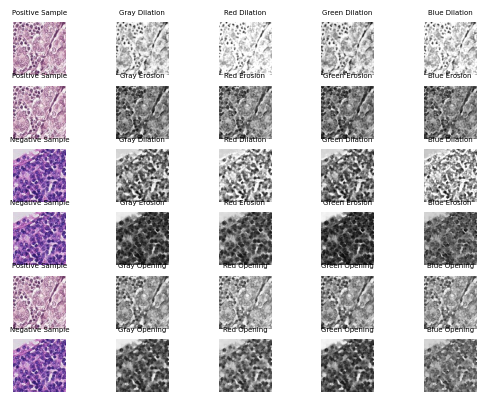

In [ ]:
positive_gray_image = skimage.color.rgb2gray(positive_sample_image)
positive_red_image = positive_sample_image[:,:,0]
positive_green_image = positive_sample_image[:,:,1]
positive_blue_image = positive_sample_image[:,:,2]
negative_gray_image = skimage.color.rgb2gray(negative_sample_image)
negative_red_image = negative_sample_image[:,:,0]
negative_green_image = negative_sample_image[:,:,1]
negative_blue_image = negative_sample_image[:,:,2]

positive_gray_dilation = skimage.morphology.dilation(positive_gray_image)
positive_red_dilation = skimage.morphology.dilation(positive_red_image)
positive_green_dilation = skimage.morphology.dilation(positive_green_image)
positive_blue_dilation = skimage.morphology.dilation(positive_blue_image)

positive_gray_erosion = skimage.morphology.erosion(positive_gray_image)
positive_red_erosion = skimage.morphology.erosion(positive_red_image)
positive_green_erosion = skimage.morphology.erosion(positive_green_image)
positive_blue_erosion = skimage.morphology.erosion(positive_blue_image)

negative_gray_dilation = skimage.morphology.dilation(negative_gray_image)
negative_red_dilation = skimage.morphology.dilation(negative_red_image)
negative_green_dilation = skimage.morphology.dilation(negative_green_image)
negative_blue_dilation = skimage.morphology.dilation(negative_blue_image)

negative_gray_erosion = skimage.morphology.erosion(negative_gray_image)
negative_red_erosion = skimage.morphology.erosion(negative_red_image)
negative_green_erosion = skimage.morphology.erosion(negative_green_image)
negative_blue_erosion = skimage.morphology.erosion(negative_blue_image)

positive_gray_opening = skimage.morphology.opening(positive_gray_image)
positive_red_opening = skimage.morphology.opening(positive_red_image)
positive_green_opening = skimage.morphology.opening(positive_green_image)
positive_blue_opening = skimage.morphology.opening(positive_blue_image)

negative_gray_opening = skimage.morphology.opening(negative_gray_image)
negative_red_opening = skimage.morphology.opening(negative_red_image)
negative_green_opening = skimage.morphology.opening(negative_green_image)
negative_blue_opening = skimage.morphology.opening(negative_blue_image)

fig, axarr = plt.subplots(6,5)

axarr[0,0].imshow(positive_sample_image)
axarr[0,0].axis("off")
axarr[0,0].set_title("Positive Sample", fontsize = 5)

axarr[0,1].imshow(positive_gray_dilation, cmap = 'gray')
axarr[0,1].axis("off")
axarr[0,1].set_title("Gray Dilation", fontsize = 5)

axarr[0,2].imshow(positive_red_dilation, cmap = 'gray')
axarr[0,2].axis("off")
axarr[0,2].set_title("Red Dilation", fontsize = 5)

axarr[0,3].imshow(positive_green_dilation, cmap = 'gray')
axarr[0,3].axis("off")
axarr[0,3].set_title("Green Dilation", fontsize = 5)

axarr[0,4].imshow(positive_blue_dilation, cmap = 'gray')
axarr[0,4].axis("off")
axarr[0,4].set_title("Blue Dilation", fontsize = 5)

axarr[1,0].imshow(positive_sample_image)
axarr[1,0].axis("off")
axarr[1,0].set_title("Positive Sample", fontsize = 5)

axarr[1,1].imshow(positive_gray_erosion, cmap = 'gray')
axarr[1,1].axis("off")
axarr[1,1].set_title("Gray Erosion", fontsize = 5)

axarr[1,2].imshow(positive_red_erosion, cmap = 'gray')
axarr[1,2].axis("off")
axarr[1,2].set_title("Red Erosion", fontsize = 5)

axarr[1,3].imshow(positive_green_erosion, cmap = 'gray')
axarr[1,3].axis("off")
axarr[1,3].set_title("Green Erosion", fontsize = 5)

axarr[1,4].imshow(positive_blue_erosion, cmap = 'gray')
axarr[1,4].axis("off")
axarr[1,4].set_title("Blue Erosion", fontsize = 5)

axarr[2,0].imshow(negative_sample_image)
axarr[2,0].axis("off")
axarr[2,0].set_title("Negative Sample", fontsize = 5)

axarr[2,1].imshow(negative_gray_dilation, cmap = 'gray')
axarr[2,1].axis("off")
axarr[2,1].set_title("Gray Dilation", fontsize = 5)

axarr[2,2].imshow(negative_red_dilation, cmap = 'gray')
axarr[2,2].axis("off")
axarr[2,2].set_title("Red Dilation", fontsize = 5)

axarr[2,3].imshow(negative_green_dilation, cmap = 'gray')
axarr[2,3].axis("off")
axarr[2,3].set_title("Green Dilation", fontsize = 5)

axarr[2,4].imshow(negative_blue_dilation, cmap = 'gray')
axarr[2,4].axis("off")
axarr[2,4].set_title("Blue Dilation", fontsize = 5)

axarr[3,0].imshow(negative_sample_image)
axarr[3,0].axis("off")
axarr[3,0].set_title("Negative Sample", fontsize = 5)

axarr[3,1].imshow(negative_gray_erosion, cmap = 'gray')
axarr[3,1].axis("off")
axarr[3,1].set_title("Gray Erosion", fontsize = 5)

axarr[3,2].imshow(negative_red_erosion, cmap = 'gray')
axarr[3,2].axis("off")
axarr[3,2].set_title("Red Erosion", fontsize = 5)

axarr[3,3].imshow(negative_green_erosion, cmap = 'gray')
axarr[3,3].axis("off")
axarr[3,3].set_title("Green Erosion", fontsize = 5)

axarr[3,4].imshow(negative_blue_erosion, cmap = 'gray')
axarr[3,4].axis("off")
axarr[3,4].set_title("Blue Erosion", fontsize = 5)

axarr[4,0].imshow(positive_sample_image)
axarr[4,0].axis("off")
axarr[4,0].set_title("Positive Sample", fontsize = 5)

axarr[4,1].imshow(positive_gray_opening, cmap = 'gray')
axarr[4,1].axis("off")
axarr[4,1].set_title("Gray Opening", fontsize = 5)

axarr[4,2].imshow(positive_red_opening, cmap = 'gray')
axarr[4,2].axis("off")
axarr[4,2].set_title("Red Opening", fontsize = 5)

axarr[4,3].imshow(positive_green_opening, cmap = 'gray')
axarr[4,3].axis("off")
axarr[4,3].set_title("Green Opening", fontsize = 5)

axarr[4,4].imshow(positive_blue_opening, cmap = 'gray')
axarr[4,4].axis("off")
axarr[4,4].set_title("Blue Opening", fontsize = 5)

axarr[5,0].imshow(negative_sample_image)
axarr[5,0].axis("off")
axarr[5,0].set_title("Negative Sample", fontsize = 5)

axarr[5,1].imshow(negative_gray_opening, cmap = 'gray')
axarr[5,1].axis("off")
axarr[5,1].set_title("Gray Opening", fontsize = 5)

axarr[5,2].imshow(negative_red_opening, cmap = 'gray')
axarr[5,2].axis("off")
axarr[5,2].set_title("Red Opening", fontsize = 5)

axarr[5,3].imshow(negative_green_opening, cmap = 'gray')
axarr[5,3].axis("off")
axarr[5,3].set_title("Green Opening", fontsize = 5)

axarr[5,4].imshow(negative_blue_opening, cmap = 'gray')
axarr[5,4].axis("off")
axarr[5,4].set_title("Blue Opening", fontsize = 5)

Hard to say whether just dilation or erosion are useful for our purposes, but opening (erosion followed by dilation) in order to first remove lone features and enhance strongly represented features appears to mellow extreme values while maintaining structural properties as desired. Opening appears to lose image “resolution”, but does cluster objects into more apparent color divisions.

Text(0.5, 1.0, 'Negative Concatenated Opening')

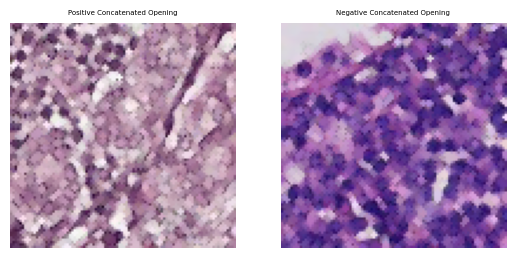

In [ ]:
total_positive_opening = np.dstack((positive_red_opening, positive_green_opening, positive_blue_opening))
total_negative_opening = np.dstack((negative_red_opening, negative_green_opening, negative_blue_opening))

fig, axarr = plt.subplots(1,2)

axarr[0].imshow(total_positive_opening)
axarr[0].axis("off")
axarr[0].set_title("Positive Concatenated Opening", fontsize = 5)

axarr[1].imshow(total_negative_opening)
axarr[1].axis("off")
axarr[1].set_title("Negative Concatenated Opening", fontsize = 5)